In [11]:
import os
import pandas as pd

# Path to your directory containing the .txt files
directory_path = r''

# Iterate over all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):  # Check if it's a .txt file
        file_path = os.path.join(directory_path, filename)
        
        # Determine if the file is an 'error' file or a 'solution' file
        if filename.startswith("error"):
            # Read the file, skipping the first row and assuming space-delimited data
            data = pd.read_csv(file_path, sep=r'\s+', skiprows=1, header=None)
            
            # Rename columns for 'error' files
            data.columns = ['time_step', 'Error (Linf)']
            
        elif filename.startswith("solution"):
            # Read the file assuming it's space-delimited
            data = pd.read_csv(file_path, sep=r'\s+')
            # For 'solution' files, we assume no header changes are needed
        
        else:
            # Skip other files that are not 'error' or 'solution'
            continue

        # Create the output CSV file path
        csv_file_path = os.path.join(directory_path, f"{os.path.splitext(filename)[0]}.csv")

        # Save the DataFrame to a CSV file
        data.to_csv(csv_file_path, index=False)

print("All files processed.")


All files processed.


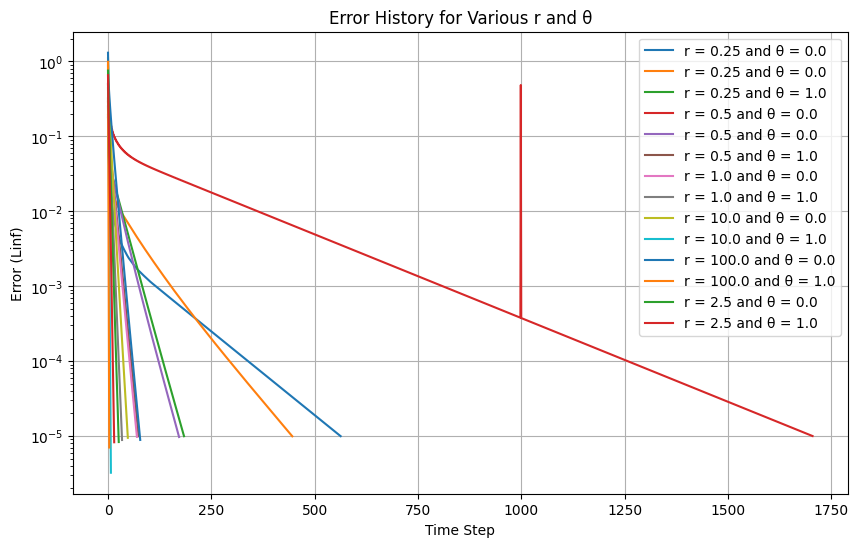

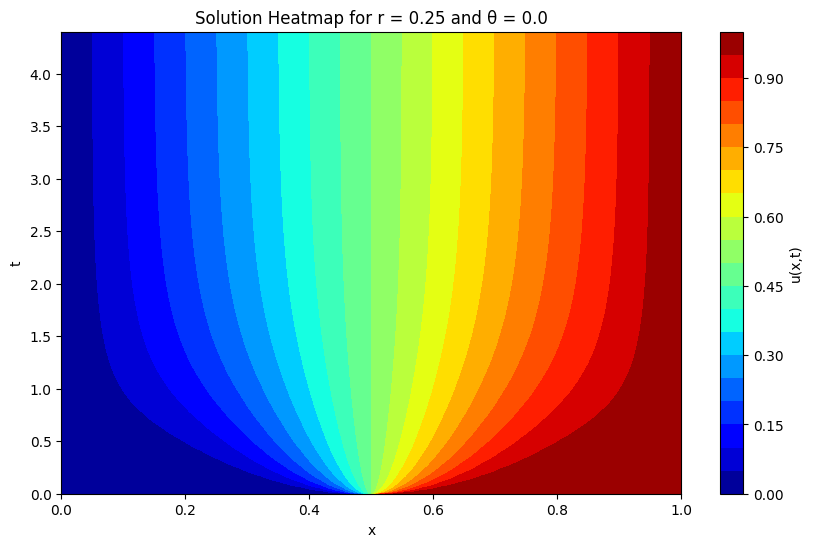

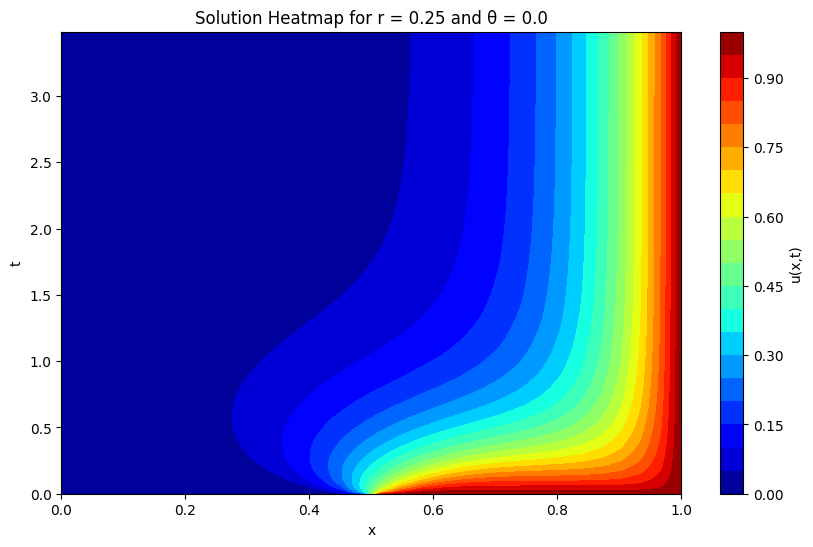

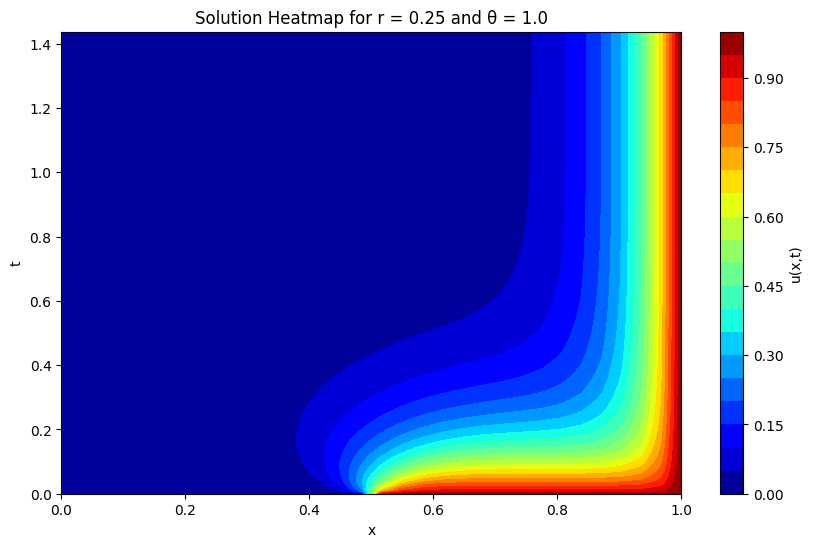

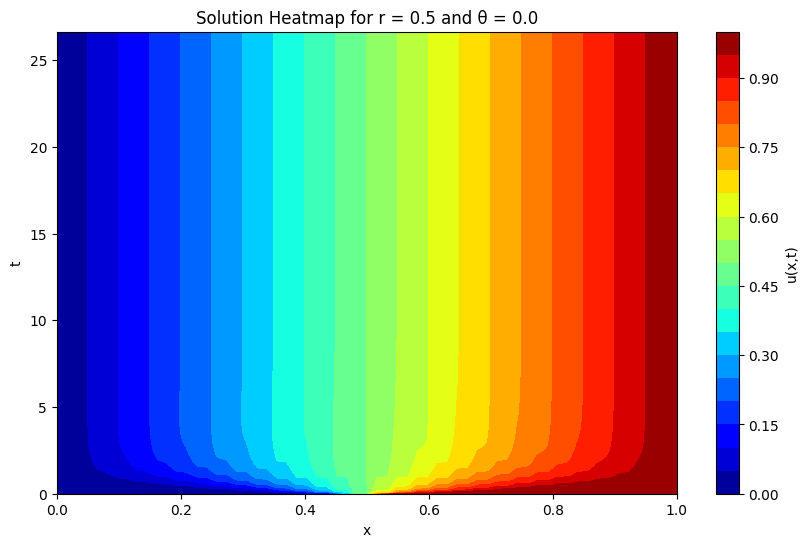

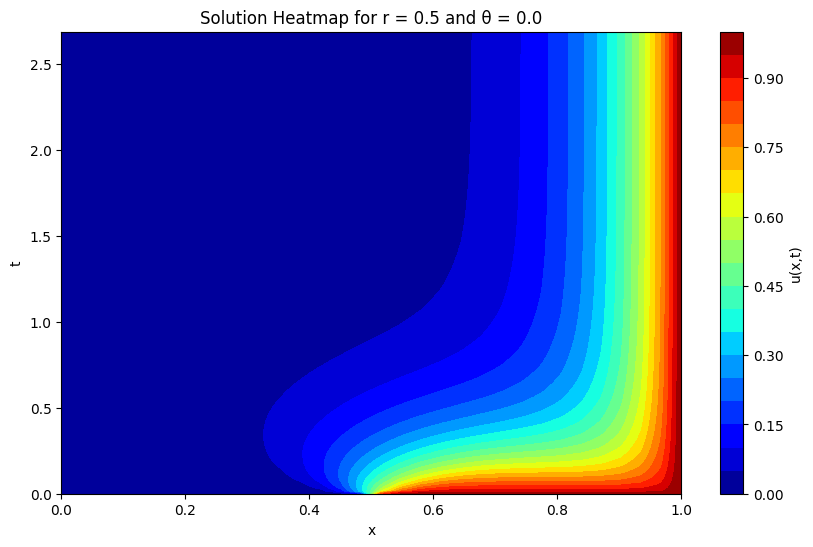

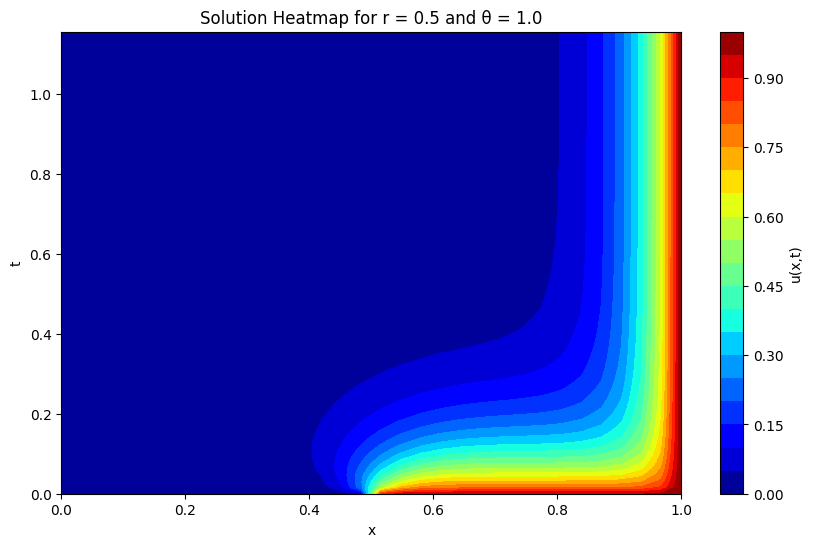

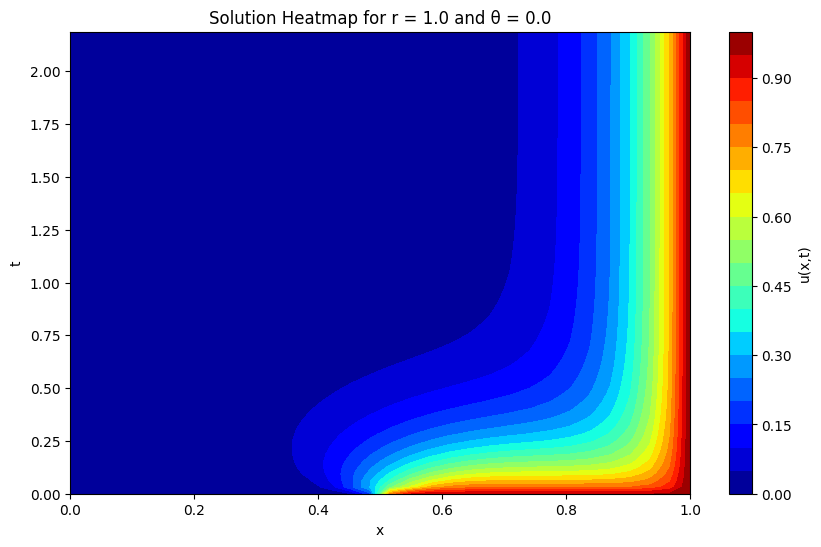

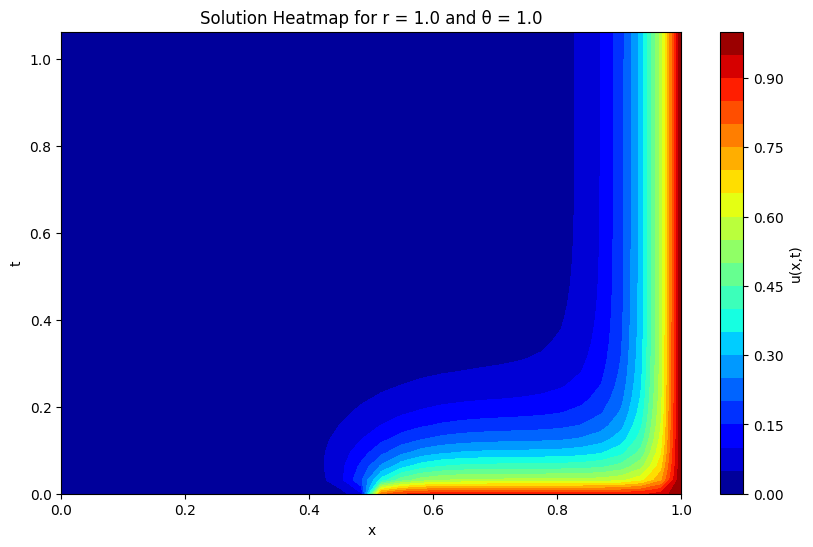

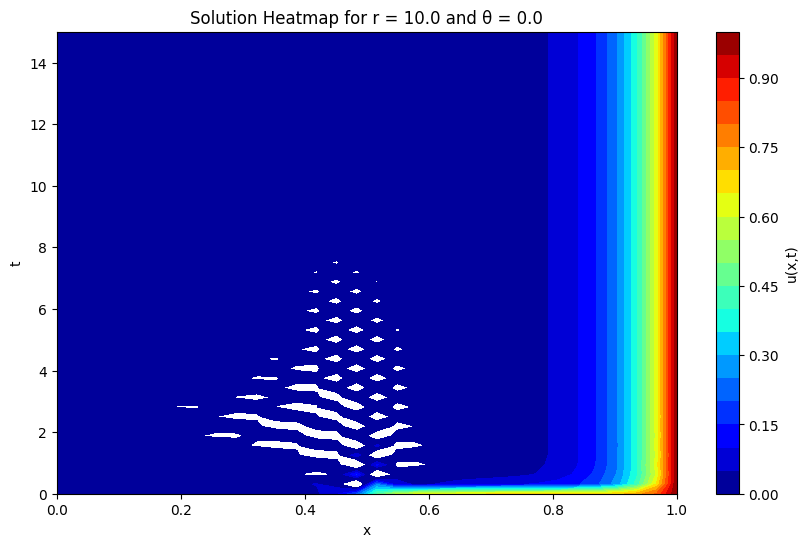

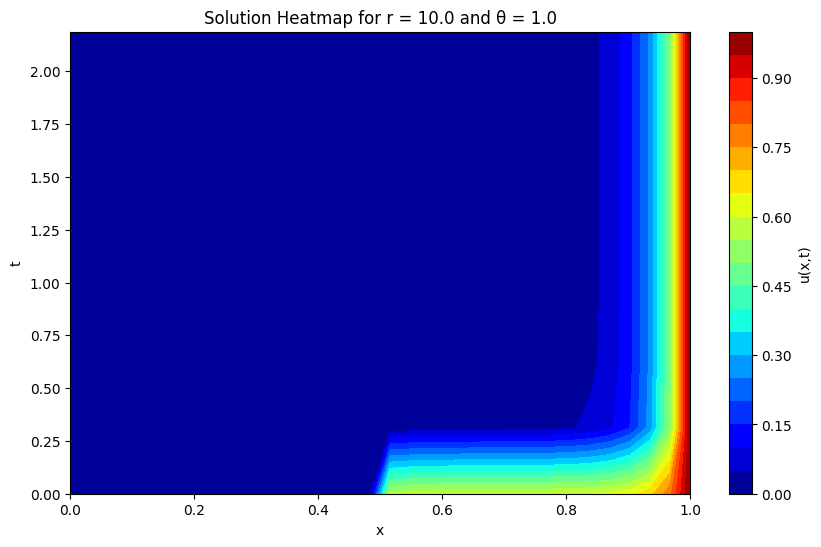

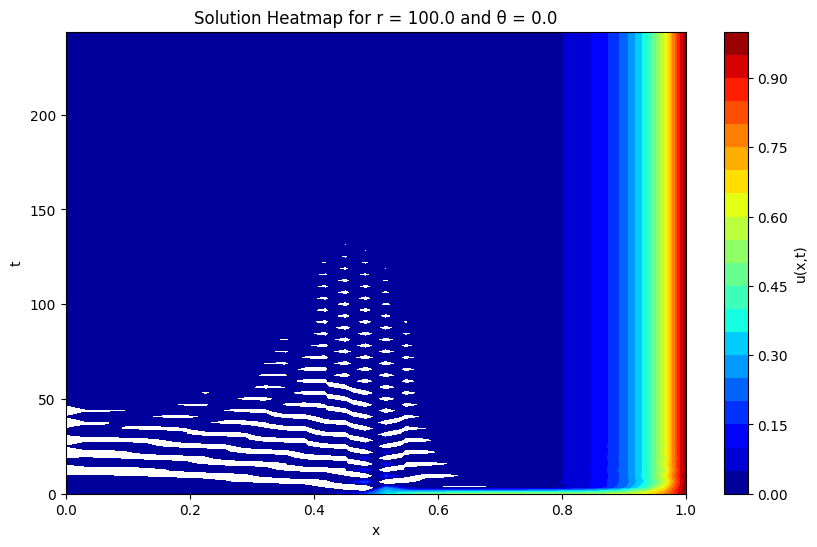

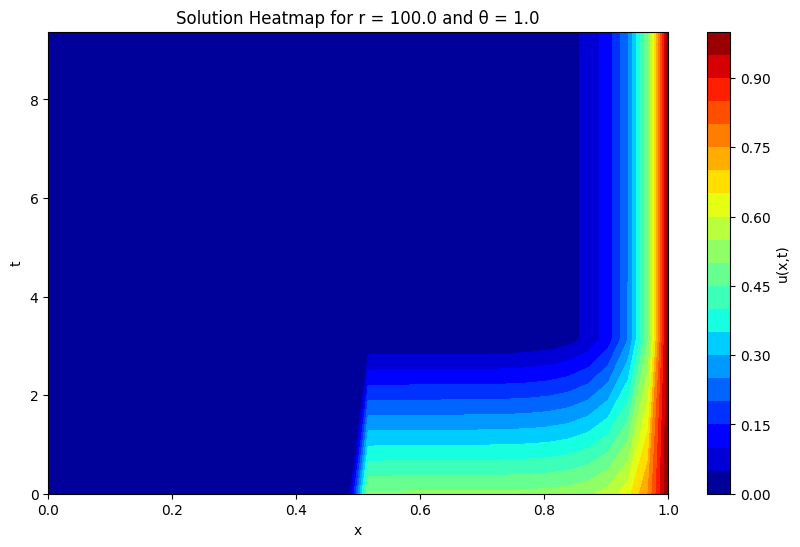

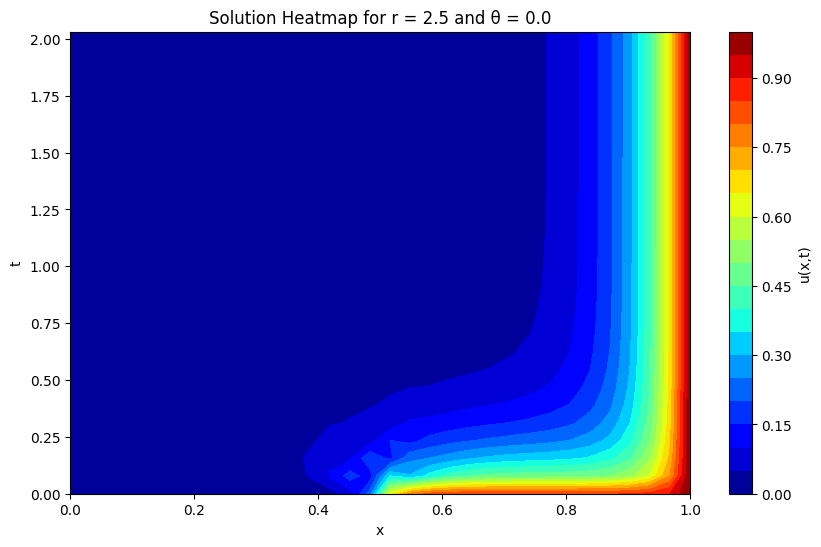

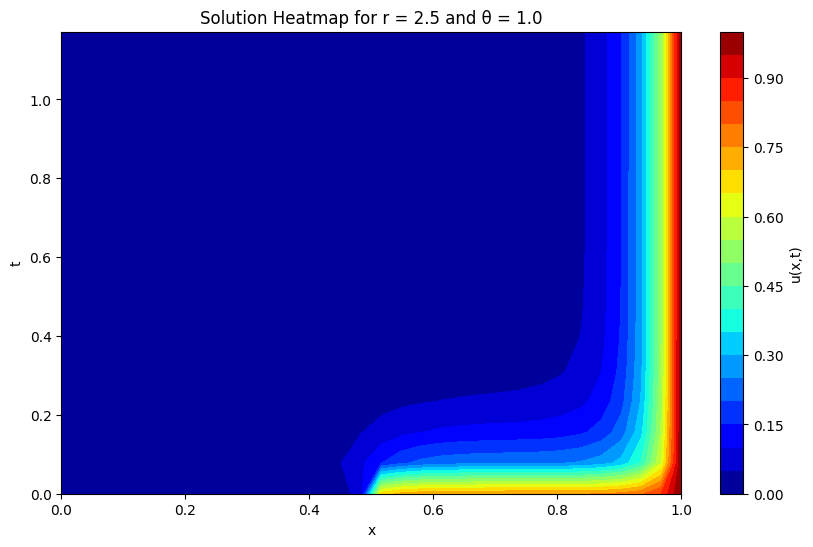

In [31]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path to your directory containing the .csv files
directory_path = r''

# Lists to hold the data for error and solution files
error_files_data = []
solution_files_data = []

# Function to extract r and θ from filenames
def extract_r_theta(filename):
    parts = filename.split('_')
    r_value = parts[2]
    theta_value = parts[4].split('.')[0]  # Remove .csv extension or .txt
    return float(r_value), float(theta_value)

# Iterate over all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):  # Check if it's a .csv file
        file_path = os.path.join(directory_path, filename)
        
        if filename.startswith("error"):
            # Read the 'error' csv file
            data = pd.read_csv(file_path)
            error_files_data.append((filename, data))  # Store filename and data as a tuple
            
        elif filename.startswith("solution"):
            # Read the 'solution' csv file
            data = pd.read_csv(file_path)
            solution_files_data.append((filename, data))  # Store filename and data as a tuple

# Plot for 'error' files with updated labeling
def plot_error_files():
    plt.figure(figsize=(10, 6))
    for filename, data in error_files_data:
        r, theta = extract_r_theta(filename)
        plt.plot(data['time_step'], data['Error (Linf)'], label=f'r = {r} and θ = {theta}')

    plt.yscale('log')  # Logarithmic scale for better visualization of error
    plt.xlabel('Time Step')
    plt.ylabel('Error (Linf)')
    plt.title('Error History for Various r and θ')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Updated plot function for 'solution' files with more color divisions
def plot_solution_files():
    for filename, data in solution_files_data:
        plt.figure(figsize=(10, 6))  # Create a new figure for each file
        r, theta = extract_r_theta(filename)
        
        # Create a pivot table for heatmap
        pivot_data = data.pivot_table(index='t', columns='x', values='u', aggfunc='mean')
        
        # Define the levels for the contour plot (from 0 to 1 in steps of 0.05)
        levels = np.arange(0, 1.05, 0.05)
        
        # Create heatmap with custom levels
        X_unique = pivot_data.columns
        T_unique = pivot_data.index
        U_matrix = pivot_data.values
        
        # Create the contour plot with the defined levels
        contour = plt.contourf(X_unique, T_unique, U_matrix, levels=levels, cmap='jet')
        plt.colorbar(contour, label='u(x,t)')  # Heatmap color bar
        
        plt.xlabel('x')
        plt.ylabel('t')
        plt.title(f'Solution Heatmap for r = {r} and θ = {theta}')
        plt.show()

# Call the plotting functions
plot_error_files()
plot_solution_files()
